In [2]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

In [3]:
online = pandas.read_excel(
    io="./Exercise39-Exercise45/Online Retail.xlsx", 
    sheet_name="Online Retail", header=0
)

In [4]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [44]:
print(
"Data dimension (row count, col count): {dim}"
.format(dim=online.shape)
)
print(
"Count of unique invoice numbers: {cnt}"
.format(cnt=online.InvoiceNo.nunique())
)
print(
"Count of unique customer ids: {cnt}"
.format(cnt=online.CustomerID.nunique())
)

Data dimension (row count, col count): (541909, 9)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


In [45]:
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

In [46]:
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

In [47]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [48]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


In [49]:
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print(
    "Length of list of invoice numbers: {ln}"
    .format(ln=len(invoice_no_list))
)

Length of list of invoice numbers: 20136


In [50]:
subset_invoice_no_list = invoice_no_list[0:5000]
print(
    "Length of subset list of invoice numbers: {ln}"
    .format(ln=len(subset_invoice_no_list))
)

Length of subset list of invoice numbers: 5000


In [51]:
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

In [52]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [53]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)


Data dimension (row count, col count): (133315, 2)
Count of unique invoice numbers: 5000


In [54]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)
    
print(invoice_item_list[1:5])

[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [55]:
#EXERCISE 5
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [57]:
online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

# this is a very big table, so for more 
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979, 
    online_encoder_df.columns.tolist()[0:8]
]

,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,True,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [58]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online_encoder_df.shape)
)

Data dimension (row count, col count): (5000, 3135)


In [59]:
#EXERCISE 6
mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

,support,itemsets


In [60]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


In [61]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [62]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets,length
0,0.0110,( OVAL WALL MIRROR DIAMANTE ),1
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON ),1
2,0.0178,(10 COLOUR SPACEBOY PEN),1
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS),1
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES),1
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND),1
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT),1


In [63]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

,support,itemsets,length
2,0.0178,(10 COLOUR SPACEBOY PEN),1


In [64]:
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
889,0.0200,"(REGENCY CAKESTAND 3 TIER, 6 RIBBONS RUSTIC CH...",2
950,0.0208,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...",2
1565,0.0206,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1640,0.0204,"(HOME BUILDING BLOCK WORD, WHITE HANGING HEART...",2
1753,0.0206,"(REGENCY CAKESTAND 3 TIER, JAM MAKING SET WITH...",2
1792,0.0206,"(JUMBO BAG PINK POLKADOT, JUMBO BAG OWLS)",2
1879,0.0208,"(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG RED RE...",2
1944,0.0204,"(JUMBO BAG WOODLAND ANIMALS, JUMBO STORAGE BAG...",2


Text(0.5, 1.0, 'Support')

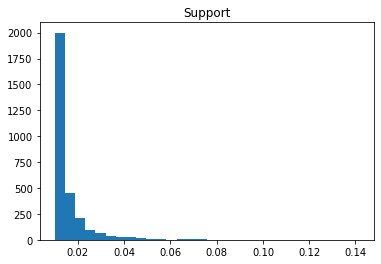

In [65]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support")

In [66]:
#Exercise 7
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)
rules.loc[0:6]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617


In [67]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


In [68]:
rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="lift",
    min_threshold=50, 
    support_only=False
)
rules2.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0156,0.0126,0.0108,0.692308,54.945055,0.010603,3.209050
1,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0126,0.0156,0.0108,0.857143,54.945055,0.010603,6.890800
2,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
3,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
4,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
5,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
6,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0122,0.871429,62.244898,0.012004,7.668889


In [69]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


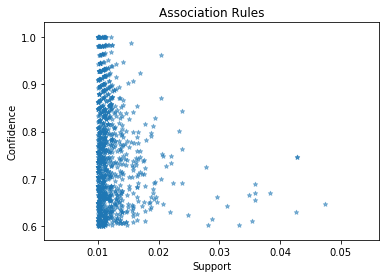

In [70]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

Text(0.5, 1.0, 'Confidence')

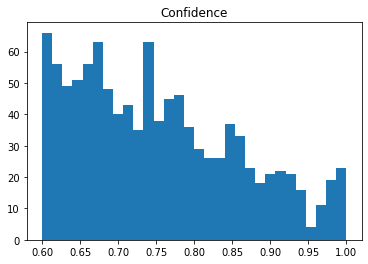

In [71]:
rules.hist("confidence", grid=False, bins=30)
plt.title("Confidence")


Text(0.5, 1.0, 'Lift')

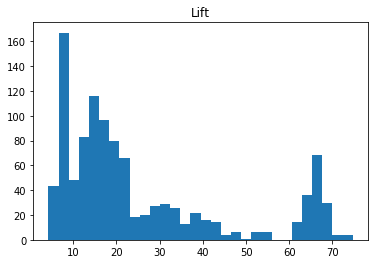

In [72]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")


Text(0.5, 1.0, 'Leverage')

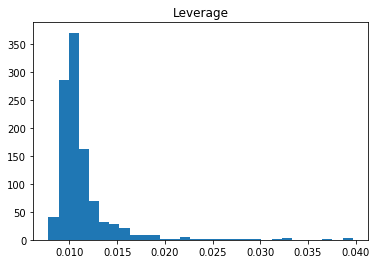

In [73]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage")


Text(0.5, 1.0, 'Conviction')

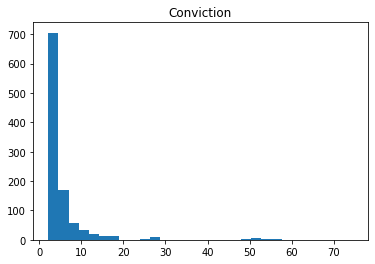

In [74]:
plt.hist(
    rules[numpy.isfinite(rules['conviction'])].conviction.values, 
    bins = 30
)
plt.title("Conviction")
